# Import Libraries

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the clean data

In [2]:
medium = pd.read_csv("Medium_Clean.csv")
medium = medium.drop("Unnamed: 0", axis=1)

medium.head(5)

,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Reading_Time,Claps,url,Author_url,Tag_ai,Tag_big-data,Tag_computer-vision,Tag_data-science,Tag_deep-learning,Tag_machine-learning,Tag_nlp,Tag_python
0,5 Trends for AI in 2019,"Ethics, driverless cars, cashierless stores, c...",1,David Vandegrift,Predict,2019,1,1,5,278.0,https://medium.com/predict/5-trends-for-ai-in-...,https://medium.com/@DavidVandegrift,1,0,0,0,0,0,0,0
1,My Journey from Container Microservices Serve...,NaN,1,Yun Zhi Lin,FAUN,2019,1,1,4,63.0,https://faun.pub/my-journey-from-container-mic...,https://faun.pub/@yunspace,1,0,0,0,0,0,0,0
2,*FREE* Viral Giveaway Chatbot Template,"As per a study by ubisend.com, almost 50% peop...",1,Prakhar Gupta,NaN,2019,1,1,3,4.0,https://medium.com/@prakhargupta/free-viral-gi...,https://medium.com/@prakhargupta,1,0,0,0,0,0,0,0
3,In search of wisdom in the information and kno...,NaN,1,Richard Schutte,NaN,2019,1,1,5,2.0,https://medium.com/@richardschutte/in-search-o...,https://medium.com/@richardschutte,1,0,0,0,0,0,0,0
4,Cyberpunk,NaN,1,Ian Chen,NaN,2019,1,1,4,13.0,https://medium.com/@ianchen_42562/%E9%9B%9C%E8...,https://medium.com/@ianchen_42562,1,0,0,0,0,0,0,0


# Summarizing the Dataset

In [3]:

print("Number of Articles: ", medium.shape[0])
print("Number of Authors: ", medium.Author.value_counts().shape[0])
print("Number of Publications: ", medium.Publication.value_counts().shape[0])
print("Number of Tags: ", medium.columns[12:].shape[0])

Number of Articles:  80063
Number of Authors:  36461
Number of Publications:  6236
Number of Tags:  8


# Range of Claps Received by a Single Article

In [4]:
print("Minimum # CLaps by an Article: ", int(medium.Claps.min()), )
print("Maximum # Claps by an Article: ", int(medium.Claps.max()))

Minimum # CLaps by an Article:  0
Maximum # Claps by an Article:  34000


# Analyzing Medium Articles

# When were these articles posted?

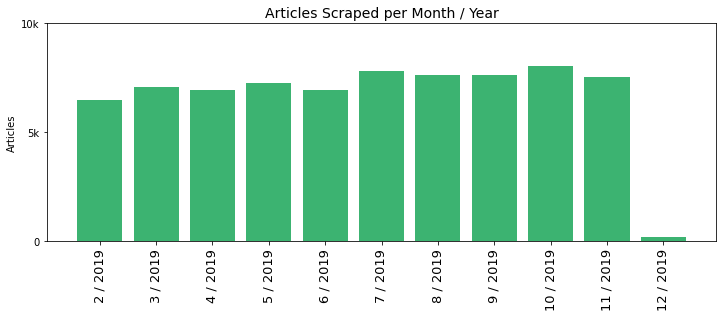

In [5]:
years = [2019]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ym_counts = []
bar_x = []
for year in years:
    for month in months:
        ym_counts.append(medium[(medium.Year==year)&(medium.Month==month)].shape[0])
        bar_x.append(str(month)+" / "+str(year))

ym_counts = ym_counts[1:12]     
bar_x = bar_x[1:12]

plt.figure(figsize=(12,4))
plt.bar(bar_x, ym_counts, color = "mediumseagreen")
plt.title("Articles Scraped per Month / Year", fontsize=14)
plt.ylabel("Articles")
plt.yticks([0,5000,10000],
           ["0", "5k","10k"])
plt.xticks(rotation=90, fontsize=13)
plt.show()

# How many claps do Medium articles receive?
* Since we collected 80k unique articles from Medium, we can get a good estimate of how many claps Medium posts tend to get. We   can use this estimate to make a reasonable metric for a succesful article. In this analysis, we will say that an exceptional   article receives the 99th percentile of claps. As exceptional tends to be a comparative term, this measure seems reasonable     to me.

* Most articles receive close to zero claps.
* Here we find that most articles receive very few claps. (Less than ten.) 50.4% of our articles receive less than 10 claps. 
* Notice how different the sizes of the bins are. Clearly the distribution of claps is HIGHLY skewed towards zero.

In [6]:
def plot_double(x, height, leftlabel, rightlabel, xlabel=None, ylabel=None, ylocs=None, yticks=None,ylim=None, title = "50.4% of Articles Receive Less Than Ten Claps"):
    plt.figure(figsize=(7,7))
    plt.bar(x, height, color="mediumseagreen")
    plt.text(0-.1,height[0]+(max(height)*0.05), str(round(100*height[0]/sum(height),1))+"%", fontsize=14)
    plt.text(1-.1,height[1]+(max(height)*0.05), str(round((100*height[1]/sum(height)),1))+"%", fontsize=14)

    plt.title(title, fontsize=14)
    plt.xticks([0,1], [leftlabel, rightlabel], fontsize=13)
    if xlabel:
        plt.xlabel(xlabel,fontsize=13)
    if ylabel:
        plt.ylabel(ylabel,fontsize=13)
    if ylocs:
        plt.yticks(ylocs, yticks)
    if ylim:
        plt.ylim(0,ylim)

    plt.show()

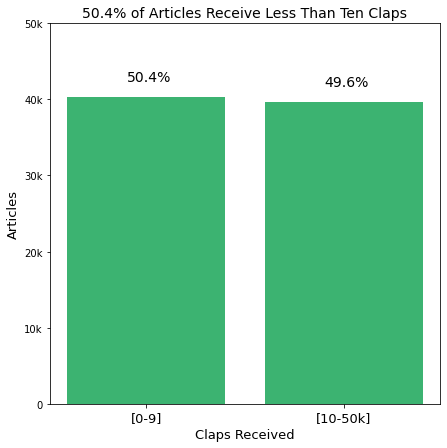

In [7]:
all_articles = medium.shape[0]
under10 = medium[medium.Claps<10].shape[0]
over10 = all_articles-under10

x = [0, 1]
height= [under10, over10]

ylocs = [0,10000,20000,30000,40000,50000]
yticks = ["0","10k", "20k", "30k", "40k","50k"]

plot_double(x, height,
            "[0-9]",
            "[10-50k]",
            xlabel="Claps Received",
            ylabel="Articles",
            ylocs=ylocs,
            yticks=yticks,
            ylim = 50000,
            title="50.4% of Articles Receive Less Than Ten Claps")

# Exceptional articles receive 1200 claps.
* To get a better understanding of how many artcles are exceptional (99th percentile), we need to plot a smooth estimation of     the distribution of claps in our data. We see below the frequency of articles who receive a certain number of claps.

* A vast majority of articles receive very few claps, However, there are quite a few articles on Medium who are above the 99th   percentile of claps.notice that the 99th percentile of claps is included in the visual. Falling at 1200 claps.Therefore, the   cutoff for an exceptional a article on Medium is 1200 claps.

In [8]:
def plot_frequency(kde_data, clip=[0,5000],bw='scott',yvariable = "Article", xvariable = "claps", title = "Exceptional",shorten=False, claplocs=[], kclaps=[]):
    plt.figure(figsize=(10,6))
    sns.kdeplot(kde_data,bw=bw, shade=True, legend=False, clip=clip, color = "mediumseagreen" )
    ninenine = kde_data.quantile(q=0.99)
    plt.axvline(x=ninenine, color="mediumseagreen")
    plt.axvspan(ninenine, clip[1], alpha=0.1, color='lightgreen')
    plt.text(ninenine+(clip[1]-ninenine)*0.075,
                       plt.yticks()[0][-1]/2.5,
                       "Top 1% = "+str(int(ninenine))+ " "+xvariable+".",
                       fontsize=14)

    plt.title(title, fontsize=15)
    plt.ylabel("Frequency of "+yvariable.title(), fontsize=13)
    plt.yticks([])

    plt.xlabel(xvariable.title(), fontsize=13)
    if shorten:
        plt.xticks(claplocs,kclaps, fontsize=12)
    plt.xlim(1,clip[1])

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


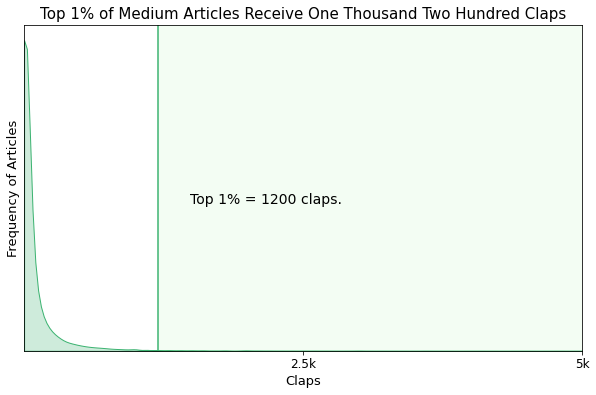

In [9]:

kclaps = ["0","2.5k", "5k"]
claplocs = [0,2500, 5000]
#KDE plot, shade below curve, clip arg includes values of 0 to 5000

plot_frequency(medium.Claps,
              clip=[0,5000],
               yvariable="Articles",
               xvariable="claps",
              title="Top 1% of Medium Articles Receive One Thousand Two Hundred Claps",
               shorten=True,
              claplocs=claplocs,
              kclaps=kclaps)


plt.show()

# How long are Medium articles?
* Most Medium articles are 2-4 minutes in length. This suprised me as most of the data science articles I read are around 7-8     minutes in length.

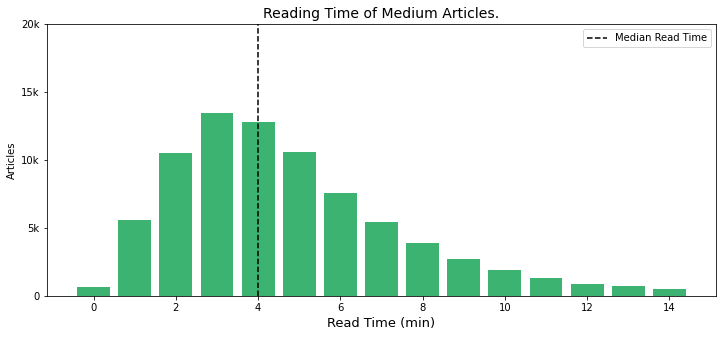

In [10]:
medians=[]
total_cs = []
readts=[]
entries = []
for x in range(15):
    medians.append(medium[medium.Reading_Time==x].Claps.quantile(q=0.5))
    readts.append(x)
    entries.append(medium[medium.Reading_Time==x].shape[0])
    total_cs.append(medium[medium.Reading_Time==x].Claps.sum())

plt.figure(figsize=(12,5))
plt.bar(readts,entries, color="mediumseagreen")
plt.vlines(medium.Reading_Time.median(),0,50000,
           color="black",
           linestyle="dashed",
           label="Median Read Time")
plt.title("Reading Time of Medium Articles.", fontsize=14)
plt.yticks([0,5000,10000,15000,20000], ["0","5k","10k","15k","20k"])
plt.ylim(0,20000)
plt.ylabel("Articles")
plt.xlabel("Read Time (min)", fontsize=13)
plt.legend()

plt.show()

In [11]:
def sort_helper(names,numbers):
    #change to array
    numbers = np.array(numbers)
    names = np.array(names)    
    #sort tag article-counts for aesthetics    
    sort_idx = list(reversed(np.argsort(numbers)))
    numbers = numbers[sort_idx]
    names = names[sort_idx]
    return names, numbers

# Analyzing Medium Tags


* In this section I look at each tag-subpopulations of my data set. Questions we want answered:

1. How many articles did we scrape from each tag?
2. Does any tag receive more applause?
3. Does the cutoff for an exceptional article vary for each tag? (Author performance metric)
4. Are any tag's articles longer than average?

# How many articles did we scrape from each tag?

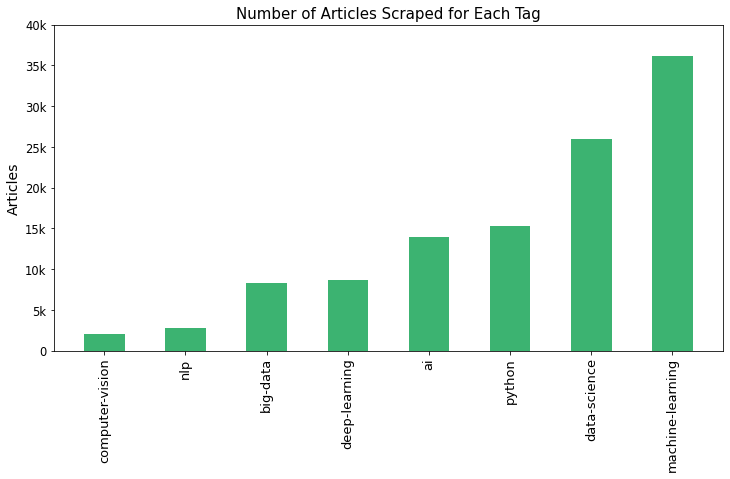

In [12]:
tag_counts=[]
tag_names=[]
for x in medium.columns[12:].values:
    tag_names.append(x[4:])
    tag_counts.append(medium[x].sum())

tag_names, tag_counts = sort_helper(tag_names, tag_counts)
tag_names = np.flip(tag_names,axis=0)
tag_counts = np.flip(tag_counts,axis=0)


plt.figure(figsize=(12,6))
plt.bar(tag_names ,tag_counts,width=0.5, color="mediumseagreen")
plt.title("Number of Articles Scraped for Each Tag", fontsize=15)
plt.ylabel("Articles", fontsize=14)
plt.yticks(fontsize=11.5)
plt.xticks(rotation=90, fontsize=13)
plt.yticks([0,5000,10000,15000,20000,25000,30000,35000,40000], ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"])
#plt.axhline(y=tag_counts.mean(), color="midnightblue", linestyle="dashed", label="Average Articles per Tag")
#plt.legend(prop={'size': 12})

plt.show()

# Does any tag receive more applause?


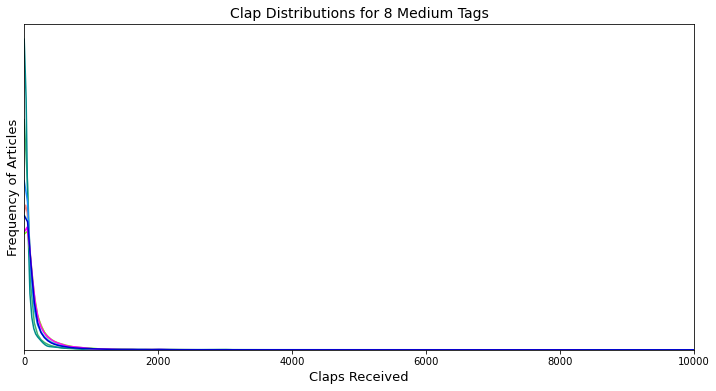

In [13]:
tags = medium.columns[12:]
colors = ["mediumseagreen","darkcyan", "lightcoral", "aquamarine", "chartreuse", "dodgerblue","magenta", "mediumblue"]
colorcount=0

plt.figure(figsize=(12,6))
ax=plt.subplot()
colorcount=0
for tag in tags:
    if colorcount==8:
        colorcount=0
    Color = colors[colorcount]  
    sns.kdeplot(medium[medium[tag]>0].
                Claps,
                color=Color,
                clip=[0,10000],
                ax=ax,
                legend=False)
    colorcount+=1
    
plt.title("Clap Distributions for 8 Medium Tags", fontsize=14)
plt.xlabel("Claps Received", fontsize=13)
plt.yticks([])
plt.ylabel("Frequency of Articles", fontsize=13)
plt.xlim(0,10000)
plt.show()

# Number of claps exceptional articles receive for each tag.
If you were to measure your article's performance, you might compare it to whichever 99th percentile is highest. That may be the population metric of 1700 claps, or the 99th percentile of the tag you write in (~1700 claps data-science for me.)

In [14]:
#a list of ninety ninth percentiles for all tags.
tags_ninenine=[]
for tag in tags:
    ninenine = medium[medium[tag]>0].Claps.quantile(q=0.99)
    tags_ninenine.append(ninenine)

tags_sort, tags_ninenine = sort_helper(tags,tags_ninenine)
tags_sort = np.flip(tags_sort, axis=0)
tags_ninenine = np.flip(tags_ninenine, axis=0)


temp=[]
for idx in range(len(tags_sort)):
    temp.append(tags_sort[idx][4:])
tags_sort = temp

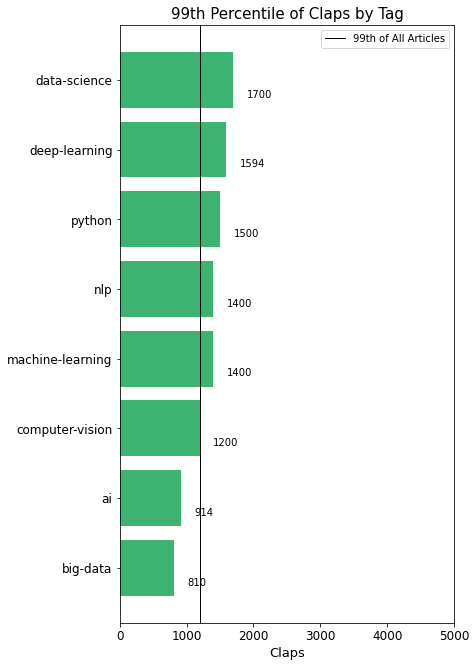

In [15]:
plt.figure(figsize=(6,11))
plt.barh(tags_sort,tags_ninenine, color="mediumseagreen")
plt.axvline(medium.Claps.quantile(0.99), color="black",lw=1,label="99th of All Articles")

for idx in range(len(tags_ninenine)):
    plt.text(tags_ninenine[idx]+200, idx-.25, str(int(tags_ninenine[idx])))

plt.title("99th Percentile of Claps by Tag", fontsize=15)
plt.legend()
plt.xlabel("Claps", fontsize=13)
plt.xticks(fontsize=12)
plt.xlim(0,5000)
plt.yticks(fontsize=12)
plt.show()

# The longest and shortest tags.
* This plot displays the median read time of each tag. Note that the median of each tag describes the number of minutes that     most articles in that tag fall under. Here we see that most tags are consistent to having a median read time of 5 minutes.   

In [16]:
tags = medium.columns[12:]
rt_medians=[]
readts=[]
rt_counts = []
rts_by_tag={}

for tag in tags:
    tag_df = medium[medium[tag]>0]
    rt_medians.append(tag_df.Reading_Time.median())
    for mins in range(32):
        readts.append(mins)
        rt_counts.append(tag_df[tag_df.Reading_Time==mins].shape[0])
    temp = [readts,rt_counts]
    rts_by_tag[tag]=temp
    readts=[]
    rt_counts = []
    temp=[]

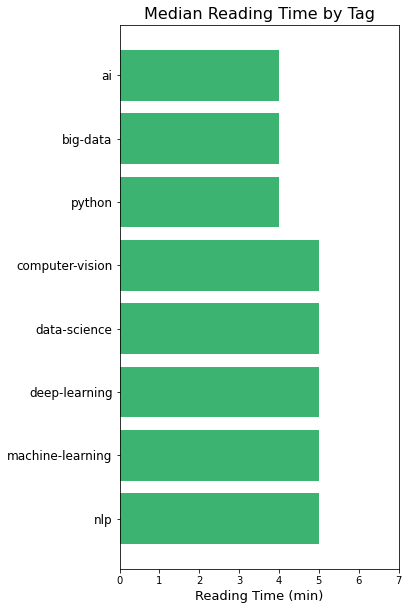

In [17]:
#sort
tags_sort, rt_medians_sort = sort_helper(tags, rt_medians)    

for x in range(len(tags_sort)):
    tags_sort[x]=tags_sort[x][4:]
    
plt.figure(figsize=(5,10))
plt.barh(tags_sort, rt_medians_sort, color="mediumseagreen")
plt.title("Median Reading Time by Tag", fontsize=16)
plt.xlabel("Reading Time (min)", fontsize=13)
plt.xticks([0,1,2,3,4,5,6,7],)
plt.yticks(fontsize=12)
plt.show()

# Analyzing Medium Authors
* In this section we will seek to look at Medium's community of authors. Specifically:

1. What percent of authors have been published in a publication?
2. How many articles do most authors write?
3. Who are the most prolific writers?

# What percent of authors have been published in a publication?
* Becoming a writer in a publication is a significant step towards becoming a high-performing Medium writer. By writing for a     publication, the readership of your articles drastically increases, but just how many authors take this step? In this           dataset, we find that a quarter of all authors have written for a Medium publication.

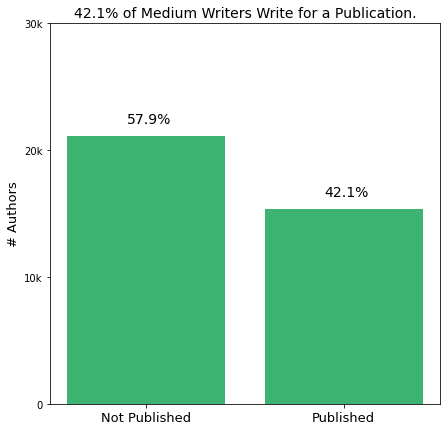

In [54]:
All_Authors = medium.Author.value_counts().shape[0] 
Published_Authors = medium[pd.notnull(medium.Publication)].Author.value_counts().shape[0] 
Not_Published_Authors = All_Authors-Published_Authors

x = [0, 1]
height= [Not_Published_Authors, Published_Authors]

ylocs = [0,10000,20000,30000]
yticks = ["0","10k","20k","30k"]

plot_double(x, height,
            "Not Published",
            "Published",
            xlabel=None,
            ylabel="# Authors",
            ylocs=ylocs,
            yticks=yticks,
            ylim=30000,
            title="42.1% of Medium Writers Write for a Publication.")

# How many articles did most authors write?
* shocking insight from our data, 64.7% of Medium authors only wrote one story. These writers have only written one article in   the period of 1/2019-12/2019.

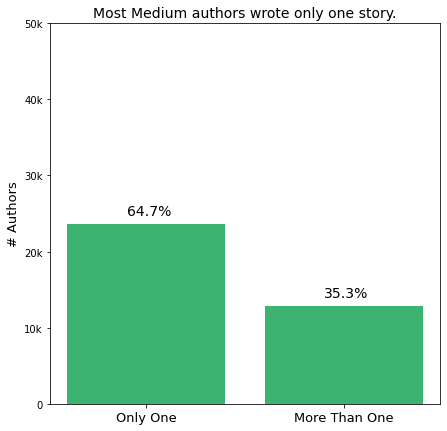

In [19]:
author_counts = medium.Author.value_counts()
single_posters = author_counts[author_counts<2].shape[0]
all_authors = author_counts.shape[0]
more_posters = all_authors-single_posters

x = [0, 1]
height= [single_posters, more_posters]

ylocs = [0,10000,20000,30000,40000,50000]
yticks = ["0","10k","20k","30k", "40k","50k"]

plot_double(x, height,
            "Only One",
            "More Than One",
            xlabel=None,
            ylabel="# Authors",
            ylocs=ylocs,
            yticks=yticks,
            ylim=50000,
            title="Most Medium authors wrote only one story.")

* So most authors wrote only one article in this one year period. But how many articles do the most frequently published         authors write? Prolific writers (top 1% most published) have written more than 16 articles in the 1/2019-12/2019 period.

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


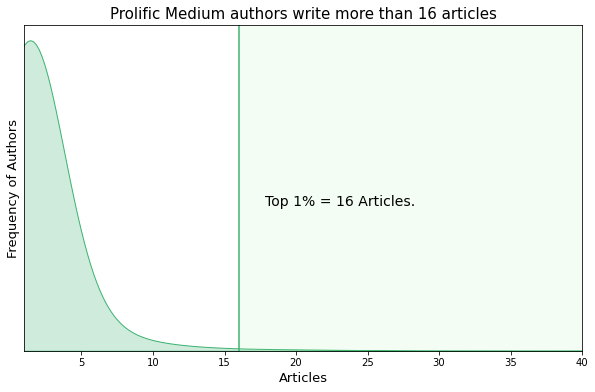

In [20]:
plot_frequency(medium.Author.value_counts(),
              clip=[0,40],
               bw=0.4,
              yvariable = "Authors",
               xvariable="Articles",
              title="Prolific authors write more than 16 articles",
              shorten=False)
plt.show()

# Top 10 Most Prolific Authors
* the first ranked author is a combination of all chinese writing author (authors who type with chinese symbols.). My scraper only saved unicode symbols, so chinese characters were saved as a space. Instead of being counted seperately, Chinese authors are counted together.

In [21]:
def print_list(data, metric):
    dash = '-' * 100
    for i in range(len(data)):
        if i == 0:
          print(dash)
          print('{:<8s}{:<7s}{:^25s}{:^12s}'.format("Rank",metric,"Author","Url"))
          print(dash)
        auth = data.index[i]
        link = medium[medium.Author==auth].Author_url.values[0]
        link = link.split("?")[0]
        print('{:<8d}{:<10d}{:<25s}{:<20s}'.format(i+1,int(data[i]),auth, link))

In [22]:
print("Top 10 Most Prolific Medium Authors")
print()
print_list( medium.Author.value_counts()[1:11], "# Articles")

Top 10 Most Prolific Medium Authors

----------------------------------------------------------------------------------------------------
Rank    # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       449                                https://medium.com/@fmhuang
2       384       ODSC Open Data Science   https://medium.com/@ODSC
3       269       Synced                   https://medium.com/@Synced
4       222       Alibaba Cloud            https://becominghuman.ai/@alibaba-cloud
5       221       Yanwei Liu               https://medium.com/@yanwei-liu
6       138       Christopher Dossman      https://medium.com/@cdossman
7       95        Nick Komissarenko        https://medium.com/@bigdataschool
8       95        The TWIML AI Podcast     https://medium.com/@twimlai
9       94        Rinu Gour                https://medium.com/@rinu.gour123
10      90        Dr. Adam Tabriz          

# Measuring Author Performance
* In this section we will describe a metric to measure author performance. The metrics we will look at?

1. Average claps per Article.
2. Creation of an 99th percentile article.
3. How many exceptional articles do top authors write?

# Total Claps Received

In [23]:
temp = medium.copy()
#creates a row that we will sum to get total articles by each author
temp["count"] = 1
auths_arts = temp.groupby("Author").sum()
total_claps = auths_arts["Claps"]
total_claps = np.flip(total_claps.sort_values(ascending=False)[:10], axis=0)

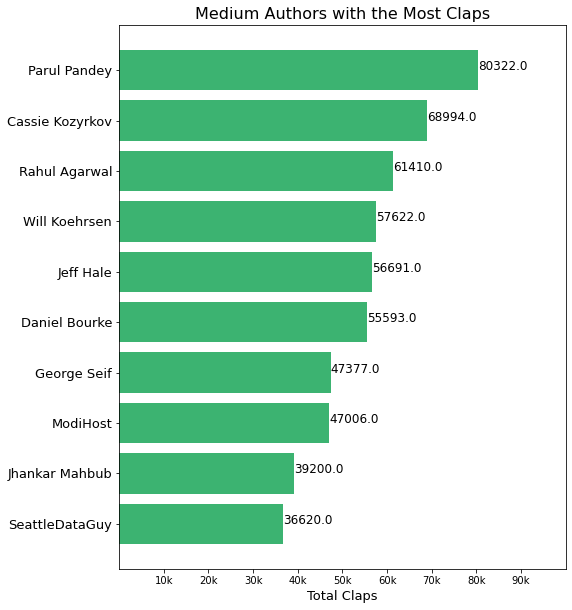

In [24]:
plt.figure(figsize=(8,10))
plt.barh(total_claps.index, total_claps, color="mediumseagreen")

for idx in range(10):
    value = total_claps[idx]
    plt.text(value, idx, str((value))+ "", fontsize=12)

plt.title("Authors with the Most Claps", fontsize=16)
plt.xlim(0,100000)
plt.xlabel("Total Claps",fontsize=13)
plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000],["10k","20k", "30k", "40k","50k","60k","70k","80k","90k"])
plt.yticks(fontsize=13)
plt.show()

In [25]:
total_claps = np.flip(total_claps, axis=0)
print("Top 10 Most Clapped Authors")
print()
print_list(total_claps, "# Claps")

Top 10 Most Clapped Authors

----------------------------------------------------------------------------------------------------
Rank    # Claps         Author              Url     
----------------------------------------------------------------------------------------------------
1       80322     Parul Pandey             https://planetachatbot.com/@pandeyparul
2       68994     Cassie Kozyrkov          https://medium.com/@kozyrk
3       61410     Rahul Agarwal            https://towardsdatascience.com/@mlwhiz
4       57622     Will Koehrsen            https://towardsdatascience.com/@williamkoehrsen
5       56691     Jeff Hale                https://towardsdatascience.com/@jeffhale
6       55593     Daniel Bourke            https://towardsdatascience.com/@mrdbourke
7       47377     George Seif              https://towardsdatascience.com/@george.seif94
8       47006     ModiHost                 https://medium.com/@ModiHost
9       39200     Jhankar Mahbub           https://medium.co

# Average claps per article.
* Is average claps per article a good metric to measure authors by? I say yes, as it favors authors who consistently write       high-performing articles. The downside? It inflates authors who are "one-hit-wonders". These authors write one post that       skyrockets in claps, then never write again.

* That being said, what is the top 1% claps/article? The top 1% of Medium authors average 1000 claps per article.

In [26]:
auths_arts["CA_Ratio"] = auths_arts['Claps']/auths_arts["count"]
CA = auths_arts.sort_values("CA_Ratio", ascending=False)[["CA_Ratio", "count"]]

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


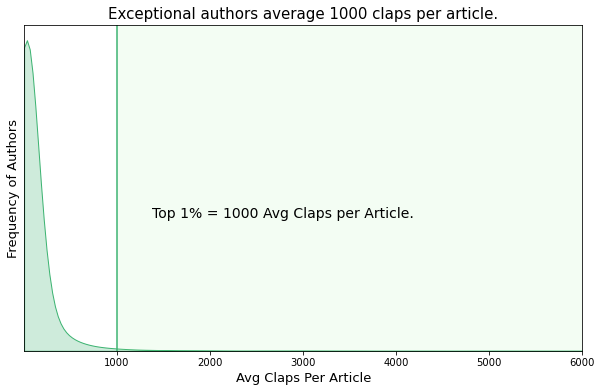

In [27]:

plot_frequency(CA.CA_Ratio,
              clip=[0,6000],
               bw=0.4,
              yvariable = "Authors",
               xvariable="Avg Claps per Article",
              title="Exceptional authors average 1000 claps per article.",
              shorten=False)

plt.show()

# Top 10 Most Clapped Authors (One-Hit-Wonders)
* Notice that a majority of the top average clapped authors are authors who have written 1 or 2 posts that have done EXTREMELY well.

In [28]:
def print_multi_list(data, metric1, metric2):
    dash = '-' * 100
    for i in range(len(data)):
        if i == 0:
          print(dash)
          print('{:<8s}{:<12s}{:<7s}{:^25s}{:^12s}'.format("Rank",metric1,metric2,"Author","Url"))
          print(dash)
        auth = data.index[i]
        link = medium[medium.Author==auth].Author_url.values[0]
        link = link.split("?")[0]
        print('{:<8d}{:<12d}{:<10d}{:<25s}{:<20s}'.format(i+1,int(data.iloc[i][0]),int(data.iloc[i][1]),auth, link))

In [29]:
print("Top 10 Authors with Highest Claps per Article")
print()
print_multi_list(CA[:10],"Claps/Art", "# Articles")

Top 10 Authors with Highest Claps per Article

----------------------------------------------------------------------------------------------------
Rank    Claps/Art   # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       19600       2         Jhankar Mahbub           https://medium.com/@jhankar.mahbub
2       19500       1         Nassim Nicholas Taleb    https://medium.com/@nntaleb
3       12800       1         Adrien Treuille          https://towardsdatascience.com/@adrien.g.treuille
4       11100       1         Chris Buetti             https://medium.com/@chrisbuetti
5       6500        1         Piotr Skalski            https://towardsdatascience.com/@piotr.skalski92
6       6400        1         Wallyson De Oliveira     https://towardsdatascience.com/@Wallyson_Oliveira
7       6400        1         Alec Jones               https://betterprogramming.pub/@koolkoder
8       6200  

# Top 10 Most Clapped Authors (with total articles > 16)
* As we said before, only 1% of writers publish more than 16 articles. So here is the leaderboard for most average clapped authors among prolific writers.

In [49]:
veterans = CA[CA["count"]>16][:10]
print("Top 10 Veteran Authors with Highest Claps per Article")
print()
print_multi_list(veterans,"Claps/Art", "# Articles")

Top 10 Veteran Authors with Highest Claps per Article

----------------------------------------------------------------------------------------------------
Rank    Claps/Art   # Articles         Author              Url     
----------------------------------------------------------------------------------------------------
1       3032        19        Will Koehrsen            https://towardsdatascience.com/@williamkoehrsen
2       2983        19        Jeff Hale                https://towardsdatascience.com/@jeffhale
3       1678        28        ModiHost                 https://medium.com/@ModiHost
4       1515        53        Parul Pandey             https://planetachatbot.com/@pandeyparul
5       1179        24        Anne Bonner              https://towardsdatascience.com/@annebonner
6       1082        26        Matthew Stewart, PhD Researcherhttps://towardsdatascience.com/@matthew_stewart
7       977         18        Tirthajyoti Sarkar       https://medium.com/@tirthajyoti
8  

# Has an author written an exceptional article? (A different metric)
* Average claps per article measures consistency of author performance, but it definitely has its flaws. In the previous         sections we looked at the 99th percentile of claps-received for all articles and determined that exceptional Medium articles   received 1200 claps.
* We see here that only 1.5% of all Medium writers have written an exceptional story. (1200 claps)

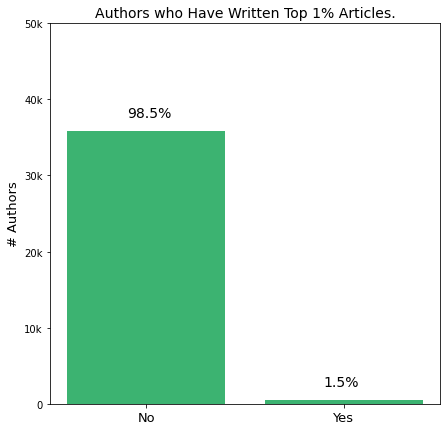

In [31]:
All_Authors = medium.Author.value_counts().shape[0] 
_99percentile = medium.Claps.quantile(q=0.99)

Authors_who_have = medium[medium.Claps>=_99percentile].Author.value_counts().shape[0]
Authors_who_have_not = All_Authors-Authors_who_have

x = [0, 1]
height= [Authors_who_have_not, Authors_who_have]

ylocs = [0,10000,20000,30000,40000,50000]
yticks = ["0","10k","20k","30k", "40k", "50k"]

plot_double(x, height,
            "No",
            "Yes",
            xlabel=None,
            ylabel="# Authors",
            ylocs=ylocs,
            yticks=yticks,
            ylim=50000,
            title="Authors who Have Written Top 1% Articles.")

# Analyzing Medium Publications
* Publications are the best way for authors to drastically increase their reader-base. With this in mind, we will look at which publications are the most performant.

1. Which publications have the most authors?
2. Which publications have published the most articles?
3. Which publications receives the most claps?
4. What is the 99th percentile for major publications?
5. Which publication averages the most claps per article?

# Which publications have the most authors?

In [32]:
publications = medium.Publication.value_counts()[:100].index
authors_in_pubs = []
for pub in publications:
    pub_df = medium[medium.Publication==pub]
    authors_in_pubs.append(pub_df.Author.value_counts().shape[0])

pubs_sort, authors_sort = sort_helper(publications, authors_in_pubs)

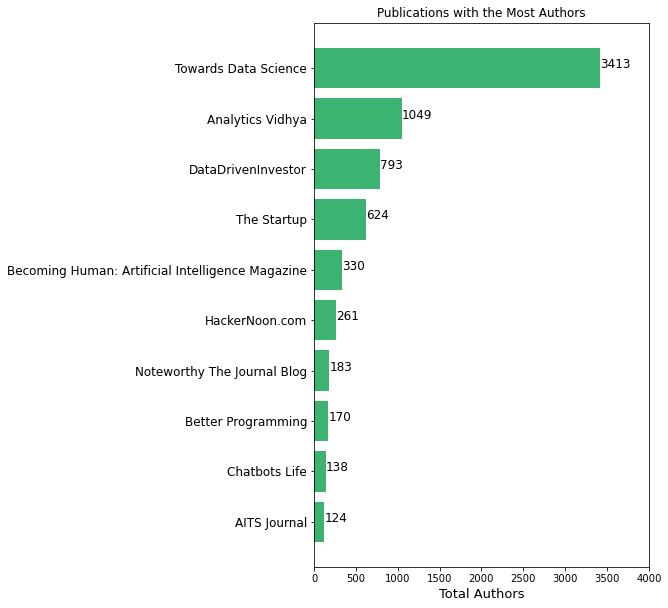

In [33]:
plt.figure(figsize=(6,10))
plt.barh(np.flip(pubs_sort[:10],axis=0), np.flip(authors_sort[:10],axis=0), color="mediumseagreen")

for idx in range(len(pubs_sort[:10])):
    value = np.flip(authors_sort[:10], axis=0)[idx]
    plt.text(value, idx, str(int(value)), fontsize=12)

plt.title("Publications with the Most Authors")
plt.xlabel("Total Authors",fontsize=13)
plt.xlim(0,4000)
plt.yticks(fontsize=12)

plt.show()

# Which publications have published the most articles?
* Only 1% of publications have posted more than 35 articles.

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


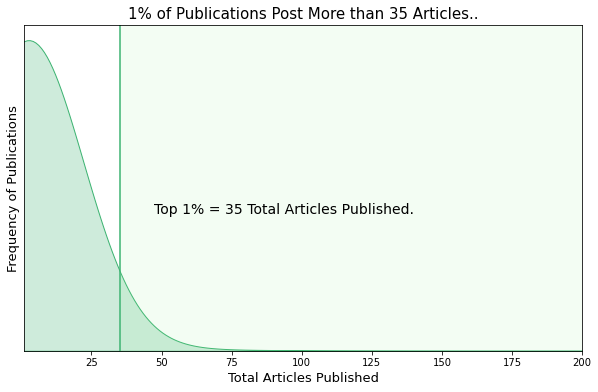

In [50]:

plot_frequency(medium.Publication.value_counts(),
              clip=[0,200],
              yvariable = "Publications",
               xvariable="Total Articles Published",
              title="1% of Publications Post More than 35 Articles..",
              shorten=False)

plt.show()

# Top 10 Publications with the most articles.

In [35]:
print("TOP 10 Most Publishing Publications")
print()
print("Publication             Articles")
print()
print(medium.Publication.value_counts()[:10])

TOP 10 Most Publishing Publications

Publication             Articles

Towards Data Science                                8294
Analytics Vidhya                                    1640
DataDrivenInvestor                                  1435
The Startup                                          754
Becoming Human: Artificial Intelligence Magazine     653
                                                     401
HackerNoon.com                                       401
Better Programming                                   348
Heartbeat                                            296
SyncedReview                                         269
Name: Publication, dtype: int64


# Which publications receive the most claps?
* Below are the top 10 medium publications with the most total claps received.

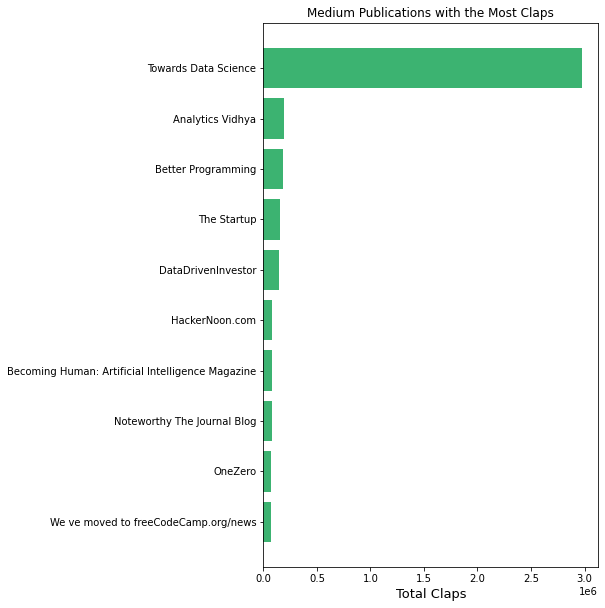

In [36]:
pubs  = medium.groupby("Publication").sum()
pubs = pubs.sort_values("Claps", ascending=True)
plt.figure(figsize=(6,10))
plt.barh(pubs.index[-10:], pubs.Claps[-10:], color="mediumseagreen")
plt.title("Medium Publications with the Most Claps")
plt.xlabel("Total Claps",fontsize=13)
plt.show()

In [37]:

pubs = pubs_sort[:10]

#a list of ninety ninth percentiles for all tags.
pubs_ninenine=[]
for pub in pubs:
    ninenine = medium[medium.Publication==pub].Claps.quantile(q=0.99)
    pubs_ninenine.append(ninenine)

pubs_sort, pubs_ninenine = sort_helper(pubs,pubs_ninenine)

# What is the top 1% of articles in major publications?

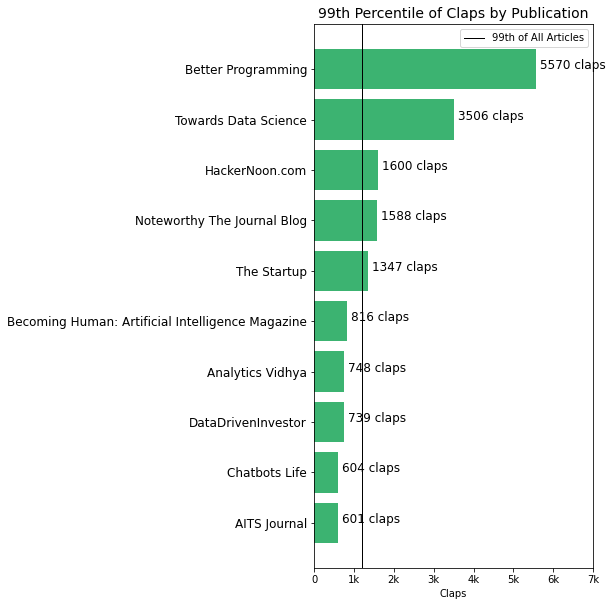

In [38]:
pubs_ninenine = np.flip(pubs_ninenine, axis=0)
pubs_sort = np.flip(pubs_sort, axis=0)


plt.figure(figsize=(5,10))
plt.barh(pubs_sort,pubs_ninenine, color="mediumseagreen")
plt.axvline(medium.Claps.quantile(0.99), color="black",lw=1,label="99th of All Articles")

for idx in range(len(pubs_ninenine)):
    plt.text(pubs_ninenine[idx]+100, idx, str(int(pubs_ninenine[idx]))+" claps", fontsize=12)

plt.title("99th Percentile of Claps by Publication", fontsize=14)
plt.legend()
plt.yticks(fontsize=12)
plt.xticks([0,1000,2000,3000,4000,5000,6000,7000],["0", "1k", "2k", "3k", "4k", "5k","6k","7k"])
plt.xlim(0,7000)
plt.xlabel("Claps")
plt.show()

# Which publications averaged the most claps?

In [39]:
temp = medium.copy()
temp["article_count"] = 1

temp = temp.dropna(subset=["Publication"])
pubs_arts = temp.groupby("Publication").sum()
pubs_arts["CA_Ratio"] = pubs_arts['Claps']/pubs_arts["article_count"]

pubs_arts = pubs_arts[pubs_arts["article_count"]>25]
pub_CA = pubs_arts.sort_values("CA_Ratio", ascending=False)[["CA_Ratio", "article_count"]]

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


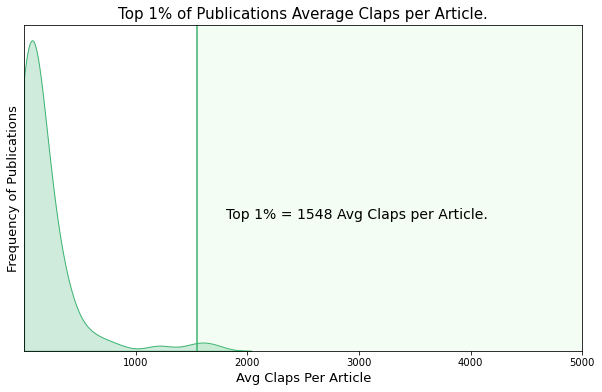

In [40]:

plot_frequency(pub_CA.CA_Ratio,
              clip=[0,5000],
              yvariable = "Publications",
               xvariable="Avg Claps per Article",
              title="Top 1% of Publications Average Claps per Article.",
              shorten=False)

plt.show()

# Top 10 Most Average Clapped Publications (No Restrictions)

In [41]:
pub_CA[:10]

,CA_Ratio,article_count
Publication,,
modihost,1678.785714,28
OneZero,1530.673469,49
SFU Professional Master s Program in Computer Science,1209.222222,36
TensorFlow,808.267857,56
We ve moved to freeCodeCamp.org/news,662.412844,109
FinTechExplained,572.758621,58
Better Programming,530.462644,348
Insight,427.148148,27
Noteworthy The Journal Blog,363.485849,212


# Top 10 Most Average Clapped Publications (Total Articles>35)
* As we said before the average claps per article tends to inflate publications/authors who have posted fewer articles that       have done exceptionally well. Here we look at the publications who have posted more articles than any other publications.       (The 99th percentile of articles published.)

In [51]:
pub_CA[pub_CA["article_count"]>35][:10]

,CA_Ratio,article_count
Publication,,
OneZero,1530.673469,49
SFU Professional Master s Program in Computer Science,1209.222222,36
TensorFlow,808.267857,56
We ve moved to freeCodeCamp.org/news,662.412844,109
FinTechExplained,572.758621,58
Better Programming,530.462644,348
Noteworthy The Journal Blog,363.485849,212
Towards Data Science,359.217145,8294
Level Up Coding,344.602151,93


# Mediums Most-Clapped Articles
## Top 10 Most Clapped Articles

In [43]:
rank=1
top_10 = medium.sort_values("Claps", ascending=False)[:10]["Title"]
top_10_urls = medium.sort_values("Claps", ascending=False)[:10]["url"]
top_10_claps = medium.sort_values("Claps", ascending=False)[:10]["Claps"]
top_10_auth = medium.sort_values("Claps", ascending=False)[:10]["Author"]


for title, url, clap, auth in zip(top_10, top_10_urls,top_10_claps, top_10_auth):
    url = url.split("?")[0]
    print(str(rank)+".  ", str(int(clap))+" claps","  ",title, "   by "+str(auth), "  \n", url)
    print()
    rank+=1

1.   34000 claps    Learn and Master Python in a Month    by Jhankar Mahbub   
 https://medium.com/@jhankar.mahbub/learn-and-master-python-in-a-month-b1acc94d5f32

2.   19500 claps    IQ is largely a pseudoscientific swindle    by Nassim Nicholas Taleb   
 https://medium.com/incerto/iq-is-largely-a-pseudoscientific-swindle-f131c101ba39

3.   18400 claps    Learn Enough Docker to be Useful    by Jeff Hale   
 https://towardsdatascience.com/learn-enough-docker-to-be-useful-b7ba70caeb4b

4.   16900 claps    TensorFlow is dead, long live TensorFlow!    by Cassie Kozyrkov   
 https://medium.com/hackernoon/tensorflow-is-dead-long-live-tensorflow-49d3e975cf04

5.   15400 claps    The Next Level of Data Visualization in Python    by Will Koehrsen   
 https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

6.   12800 claps    Turn Python Scripts into Beautiful ML Tools    by Adrien Treuille   
 https://towardsdatascience.com/coding-ml-tools-like-you-code-ml-m

# What is the range of claps in the top 1k?

In [44]:
top_1k = medium.sort_values("Claps", ascending=False)[:1000]

print("Min Claps: ",int(top_1k.Claps.min()), " Max Claps: ", int(top_1k.Claps.max()))

Min Claps:  1100  Max Claps:  34000


# How many authors are in the top 1000 articles in dataset?

In [45]:
print(top_1k.Author.value_counts().shape[0], "Authors")
print(round(top_1k.Author.value_counts().shape[0]*100/medium.Author.value_counts().shape[0],2), "% of all authors")

641 Authors
1.76 % of all authors


# What are the highest occuring publications, authors, Tags in the top 1k?

In [46]:
print("The Ten Most Frequent Authors in Top 1k:")
print()
print(top_1k.Author.value_counts()[:10])

The Ten Most Frequent Authors in Top 1k:

Parul Pandey       25
Cassie Kozyrkov    18
ModiHost           16
Rahul Agarwal      15
George Seif        14
Anne Bonner        12
Jeff Hale          11
Farhad Malik       10
Will Koehrsen      10
Daniel Bourke       9
Name: Author, dtype: int64


In [47]:
print("The Ten Most Frequent Publications in Top 1k:")
print()
print(top_1k.Publication.value_counts()[:10])

The Ten Most Frequent Publications in Top 1k:

Towards Data Science                                     502
OneZero                                                   30
Better Programming                                        28
We ve moved to freeCodeCamp.org/news                      22
modihost                                                  16
SFU Professional Master s Program in Computer Science     14
The Startup                                               13
TensorFlow                                                12
HackerNoon.com                                            11
FinTechExplained                                          10
Name: Publication, dtype: int64
